In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import util_calculation
import util_diagnostic
import util_modelling
import util_preprocessing
import util_visualization

def reload():
  importlib.reload(util_calculation)
  importlib.reload(util_diagnostic)
  importlib.reload(util_preprocessing)
  importlib.reload(util_modelling)
  importlib.reload(util_visualization)

reload()
BASE_PATH = ""
COLUMN_EXISTS_TEST = []
colAdd = ["Lama_Kuliah", "Fakultas"]

In [3]:
NAN_VALUE = np.nan

In [4]:
df_test = pd.read_csv("Data - Test.csv", delimiter=";")
COLUMN_EXISTS_TEST = df_test.columns
COLUMN_EXISTS_TRAINING = df_test.columns.tolist()+ colAdd
print(COLUMN_EXISTS_TRAINING)
df_train = pd.read_csv("Data - Final.csv", delimiter=";")
df_train.shape

['Gender', 'Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika', 'Kimia', 'Biologi', 'Geografi', 'Sosiologi', 'Antropologi', 'Extra_Kurikuler', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Lama_Kuliah', 'Fakultas']


(11499, 22)

In [5]:
df_test.columns

Index(['Gender', 'Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika', 'Kimia',
       'Biologi', 'Geografi', 'Sosiologi', 'Antropologi', 'Extra_Kurikuler',
       'Tinggal_Dengan', 'Status_Kerja', 'Biaya'],
      dtype='object')

In [6]:
df_train.columns

Index(['Nama', 'Gender', 'Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika',
       'Kimia', 'Biologi', 'Geografi', 'Sosiologi', 'Antropologi',
       'Extra_Kurikuler', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya',
       'Tgl_Daftar_Kuliah', 'Alamat', 'UKM', 'Organisasi_Kampus',
       'Lama_Kuliah', 'Fakultas'],
      dtype='object')

In [7]:
df_train_copy = df_train.copy()
df_train_copy = df_train_copy[COLUMN_EXISTS_TRAINING]
df_train_copy

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,"69,8","64,6",64,"81,5","88,2","86,7","68,3",74,"67,7","70,7",Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,"68,7","88,3","80,9","80,7","67,8","67,3","72,1","77,3","64,4","62,8",Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,"83,8","79,8","79,2","66,3","82,3","82,7","74,2",84,"75,4","65,9",Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,"66,7","63,7",64,"60,2","75,9","87,6","85,6","68,1","73,7","61,7",Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,"62,3","76,8",77,"87,1","65,1","65,7","70,8",67,"77,3",79,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Pria,61,"66,1","79,1",71,"78,7","74,4","69,1","77,2","65,8","61,3",Ekskul_3,Orang Tua,Belum,Orang Tua,"4,5",FIKOM
11495,Wanita,"75,7","76,6","86,5","78,7","86,2","87,2","81,4","62,3","71,3","83,8",Ekskul_3,NaN,Bekerja,Beasiswa,"3,5",DKV
11496,Wanita,"85,7",61,"82,7","77,6","78,7","76,3","82,2","68,6","76,5","70,9",Ekskul_2,Kos,Bekerja,Beasiswa,5,FT
11497,Wanita,"84,8","67,5","84,6","73,6","74,6","61,6","80,3","83,4","76,4","76,6",Ekskul_2,Kos,Bekerja,NaN,"4,5",DKV


Cari reasoning dari kenapa df_test cuman ada beebrapa kelas diatas dan tidak ada kelas lainnya 

In [8]:
## Kolom harus ada yang dihilangkan, karena di data testnya tidak ada, But do analysis why It is removed
## 
## 
## 

In [9]:
df_train_copy.dtypes

Gender             object
Bahasa             object
Inggris            object
TIK                object
Matematika         object
Fisika             object
Kimia              object
Biologi            object
Geografi           object
Sosiologi          object
Antropologi        object
Extra_Kurikuler    object
Tinggal_Dengan     object
Status_Kerja       object
Biaya              object
Lama_Kuliah        object
Fakultas           object
dtype: object

In [10]:
print(df_train_copy.isna().sum())
numCols = [
    "Bahasa",
    "Inggris",
    "TIK",
    "Matematika",
    "Fisika",
    "Kimia",
    "Biologi",
    "Geografi",
    "Sosiologi",
    "Antropologi"]

categoricalCols = [
    "Gender",
    "Extra_Kurikuler",
    "Status_Kerja",
    "Biaya",
    "Lama_Kuliah",
    "Fakultas",
    "Tinggal_Dengan"
]

Gender                0
Bahasa                0
Inggris               0
TIK                 526
Matematika            0
Fisika                0
Kimia                 0
Biologi               0
Geografi              0
Sosiologi           571
Antropologi         676
Extra_Kurikuler       0
Tinggal_Dengan     3982
Status_Kerja          0
Biaya              3779
Lama_Kuliah           0
Fakultas              0
dtype: int64


In [11]:
for i in df_train_copy.columns:
  
  print(df_train_copy[i].unique())

['Pria' 'Wanita']
['69,8' '68,7' '83,8' '66,7' '62,3' '66' '76,9' '61,6' '77' '73,2' '82,5'
 '70,7' '65,5' '63,9' '65,9' '72,1' '65,3' '73' '73,8' '88,6' '65,8'
 '70,2' '70,3' '64,8' '76,7' '73,3' '72,2' '72,7' '63,5' '85,8' '68,5'
 '84,7' '66,3' '80,7' '80' '68,3' '61,7' '71,6' '64,9' '80,5' '61,1'
 '88,5' '67,3' '62,8' '73,4' '75' '79,9' '81,6' '82,1' '64' '80,4' '66,8'
 '83' '62,6' '64,3' '65,2' '83,4' '81,7' '70,4' '66,1' '84,2' '78,5'
 '75,7' '69,9' '83,7' '84,5' '71,2' '73,1' '86' '80,9' '82,4' '75,6'
 '69,6' '70,9' '77,9' '79,7' '76' '64,7' '78,9' '75,9' '79,2' '80,6'
 '70,1' '65,4' '81,4' '66,2' '60,3' '70,5' '68,6' '78,6' '81,9' '64,1'
 '69,1' '85,1' '60,8' '87,7' '78,4' '72' '61,8' '74' '73,5' '87' '65' '88'
 '78' '84,8' '87,2' '71,4' '63,3' '87,4' '86,3' '62,1' '60,2' '76,5'
 '68,2' '76,1' '62,4' '63' '79,4' '85,7' '78,3' '74,2' '76,6' '83,6'
 '71,1' '66,6' '79,6' '88,2' '85,6' '86,4' '73,7' '73,6' '77,8' '64,5'
 '60,7' '75,1' '69,4' '83,9' '74,9' '69,7' '78,8' '68' '65,6' '

In [12]:
df_train_copy["Fakultas"].value_counts()

FT       2322
FTI      2316
FISIP    2299
DKV      2287
FIKOM    2275
Name: Fakultas, dtype: int64

In [13]:
util_visualization.drawCountPlot(df_train_copy, "Fakultas", "Fakultas", percentage=False)

In [14]:
numCols

['Bahasa',
 'Inggris',
 'TIK',
 'Matematika',
 'Fisika',
 'Kimia',
 'Biologi',
 'Geografi',
 'Sosiologi',
 'Antropologi']

In [15]:
df_train_copy.isna().sum()

Gender                0
Bahasa                0
Inggris               0
TIK                 526
Matematika            0
Fisika                0
Kimia                 0
Biologi               0
Geografi              0
Sosiologi           571
Antropologi         676
Extra_Kurikuler       0
Tinggal_Dengan     3982
Status_Kerja          0
Biaya              3779
Lama_Kuliah           0
Fakultas              0
dtype: int64

In [16]:
reload()
df_train_copy[numCols].fillna(np.nan,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12872\1651116896.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
util_diagnostic.getTotalUniqueColumns(df_train_copy,numCols)

Column : Bahasa, unique: 286, dtype: object
Column : Inggris, unique: 286, dtype: object
Column : TIK, unique: 275, dtype: object
Column : Matematika, unique: 286, dtype: object
Column : Fisika, unique: 286, dtype: object
Column : Kimia, unique: 286, dtype: object
Column : Biologi, unique: 286, dtype: object
Column : Geografi, unique: 286, dtype: object
Column : Sosiologi, unique: 274, dtype: object
Column : Antropologi, unique: 272, dtype: object


In [18]:
for i in df_train_copy.columns:
    print(df_train_copy[i].unique())

['Pria' 'Wanita']
['69,8' '68,7' '83,8' '66,7' '62,3' '66' '76,9' '61,6' '77' '73,2' '82,5'
 '70,7' '65,5' '63,9' '65,9' '72,1' '65,3' '73' '73,8' '88,6' '65,8'
 '70,2' '70,3' '64,8' '76,7' '73,3' '72,2' '72,7' '63,5' '85,8' '68,5'
 '84,7' '66,3' '80,7' '80' '68,3' '61,7' '71,6' '64,9' '80,5' '61,1'
 '88,5' '67,3' '62,8' '73,4' '75' '79,9' '81,6' '82,1' '64' '80,4' '66,8'
 '83' '62,6' '64,3' '65,2' '83,4' '81,7' '70,4' '66,1' '84,2' '78,5'
 '75,7' '69,9' '83,7' '84,5' '71,2' '73,1' '86' '80,9' '82,4' '75,6'
 '69,6' '70,9' '77,9' '79,7' '76' '64,7' '78,9' '75,9' '79,2' '80,6'
 '70,1' '65,4' '81,4' '66,2' '60,3' '70,5' '68,6' '78,6' '81,9' '64,1'
 '69,1' '85,1' '60,8' '87,7' '78,4' '72' '61,8' '74' '73,5' '87' '65' '88'
 '78' '84,8' '87,2' '71,4' '63,3' '87,4' '86,3' '62,1' '60,2' '76,5'
 '68,2' '76,1' '62,4' '63' '79,4' '85,7' '78,3' '74,2' '76,6' '83,6'
 '71,1' '66,6' '79,6' '88,2' '85,6' '86,4' '73,7' '73,6' '77,8' '64,5'
 '60,7' '75,1' '69,4' '83,9' '74,9' '69,7' '78,8' '68' '65,6' '

In [19]:
df_train_copy

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,"69,8","64,6",64,"81,5","88,2","86,7","68,3",74,"67,7","70,7",Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,"68,7","88,3","80,9","80,7","67,8","67,3","72,1","77,3","64,4","62,8",Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,"83,8","79,8","79,2","66,3","82,3","82,7","74,2",84,"75,4","65,9",Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,"66,7","63,7",64,"60,2","75,9","87,6","85,6","68,1","73,7","61,7",Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,"62,3","76,8",77,"87,1","65,1","65,7","70,8",67,"77,3",79,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Pria,61,"66,1","79,1",71,"78,7","74,4","69,1","77,2","65,8","61,3",Ekskul_3,Orang Tua,Belum,Orang Tua,"4,5",FIKOM
11495,Wanita,"75,7","76,6","86,5","78,7","86,2","87,2","81,4","62,3","71,3","83,8",Ekskul_3,NaN,Bekerja,Beasiswa,"3,5",DKV
11496,Wanita,"85,7",61,"82,7","77,6","78,7","76,3","82,2","68,6","76,5","70,9",Ekskul_2,Kos,Bekerja,Beasiswa,5,FT
11497,Wanita,"84,8","67,5","84,6","73,6","74,6","61,6","80,3","83,4","76,4","76,6",Ekskul_2,Kos,Bekerja,NaN,"4,5",DKV


In [20]:
reload()
df_train_copy= util_preprocessing.changeToFloatNums(df_train_copy, numCols, np.nan )

In [21]:
df_train_copy["Bahasa"].values

array([69.8, 68.7, 83.8, ..., 85.7, 84.8, 85.2])

In [22]:
df_train_copy[numCols].pcorr()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
Bahasa,1.000000,0.017399,-0.000258,-0.004301,0.014761,-0.013554,-0.006765,-0.005630,-0.009412,-0.002460
Inggris,0.017399,1.000000,-0.019256,0.002696,-0.005734,0.000015,0.005020,-0.001052,0.008981,0.001876
TIK,-0.000258,-0.019256,1.000000,0.004838,-0.014909,-0.003275,0.014398,-0.017940,0.004725,0.024234
Matematika,-0.004301,0.002696,0.004838,1.000000,0.001629,0.018624,0.005912,-0.007636,0.002802,0.001700
Fisika,0.014761,-0.005734,-0.014909,0.001629,1.000000,0.011740,0.005316,-0.009143,0.003485,-0.008889
Kimia,-0.013554,0.000015,-0.003275,0.018624,0.011740,1.000000,-0.008988,-0.008256,-0.010754,0.012029
Biologi,-0.006765,0.005020,0.014398,0.005912,0.005316,-0.008988,1.000000,-0.005909,-0.012042,-0.011141
Geografi,-0.005630,-0.001052,-0.017940,-0.007636,-0.009143,-0.008256,-0.005909,1.000000,0.016137,-0.001718
Sosiologi,-0.009412,0.008981,0.004725,0.002802,0.003485,-0.010754,-0.012042,0.016137,1.000000,0.008228
Antropologi,-0.002460,0.001876,0.024234,0.001700,-0.008889,0.012029,-0.011141,-0.001718,0.008228,1.000000


In [23]:
reload()
util_visualization.drawHeatmap(np.round(df_train_copy[numCols].corr(),2),numCols, numCols, "Korelasi Linear Antara Nilai Numerik" )

In [24]:
df_train_copy[numCols].describe()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
count,11499.000000,11499.000000,10932.00000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,10928.000000,10823.000000
mean,74.350570,74.387599,74.23981,74.443534,74.352692,74.334820,74.349691,74.283755,74.217258,74.166682
std,8.229366,8.302509,8.20048,8.240524,8.264629,8.279217,8.259486,8.245244,8.225752,8.289890
min,60.100000,60.100000,60.10000,60.100000,60.100000,60.100000,60.100000,60.100000,60.100000,60.100000
25%,67.300000,67.200000,67.10000,67.400000,67.300000,67.200000,67.300000,67.100000,67.100000,66.900000
50%,74.200000,74.500000,74.20000,74.500000,74.400000,74.200000,74.300000,74.400000,74.200000,74.000000
75%,81.400000,81.600000,81.30000,81.600000,81.400000,81.500000,81.600000,81.350000,81.400000,81.400000
max,88.600000,88.600000,88.60000,88.600000,88.600000,88.600000,88.600000,88.600000,88.600000,88.600000


df

In [25]:
reload()
for i in numCols:
    if(i == "Inggris" or i == "Bahasa"):
        util_visualization.drawHistogram(df_train_copy, i, 10).show()

In [26]:
df_train_copy.head()
#df_train_copy.to_csv("Data-final_converted.csv",index=False)

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV


In [27]:
df_train_normalize, scaler = util_preprocessing.normalizeNumericColumn(df_train_copy, numCols)

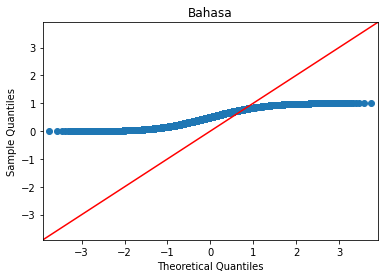

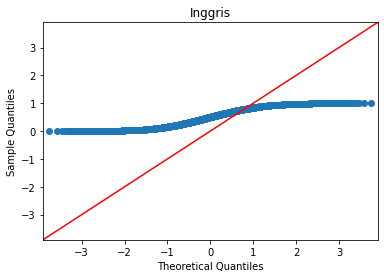

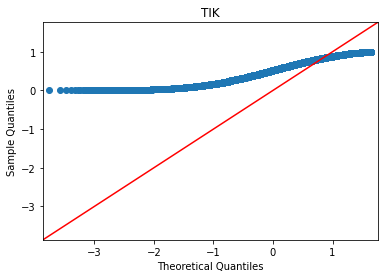

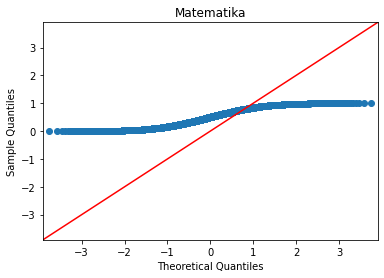

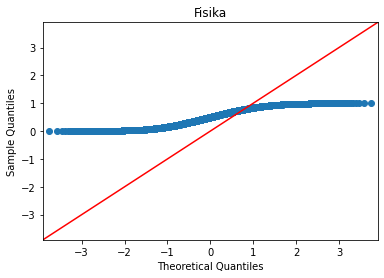

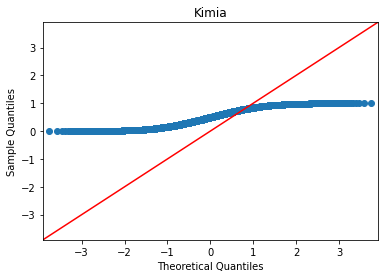

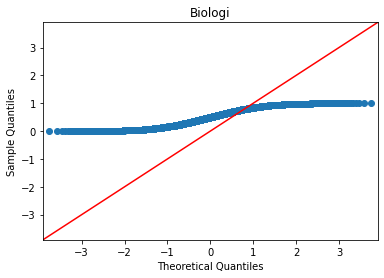

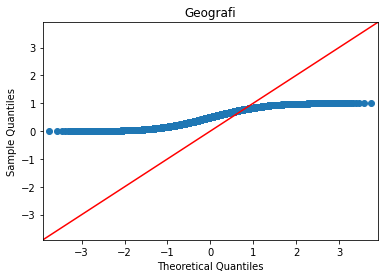

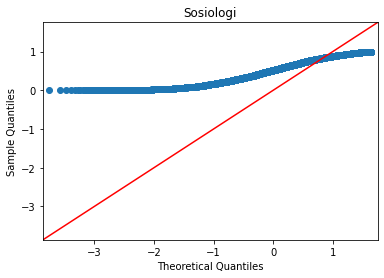

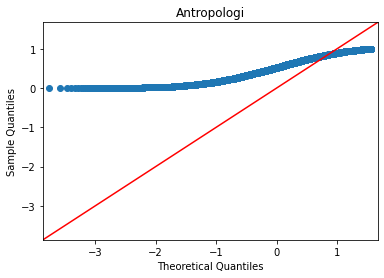

In [28]:
reload()
for i in numCols:
    util_visualization.drawQQPlot(df_train_normalize[i].values,i)

Correlation Matrix for cramers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,Extra_Kurikuler,Fakultas,Tinggal_Dengan,Status_Kerja,Biaya,Gender,Lama_Kuliah
Extra_Kurikuler,1.000000,0.000000,0.000000,0.000000,0.025199,0.016420,0.000000
Fakultas,0.000000,1.000000,0.000000,0.013693,0.021251,0.014138,0.000000
Tinggal_Dengan,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.019271
Status_Kerja,0.000000,0.013693,0.000000,1.000000,0.000000,0.014164,0.000000
Biaya,0.025199,0.021251,0.000000,0.000000,1.000000,0.000000,0.000000
Gender,0.016420,0.014138,0.000000,0.014164,0.000000,1.000000,0.000000
Lama_Kuliah,0.000000,0.000000,0.019271,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for cramers'}>

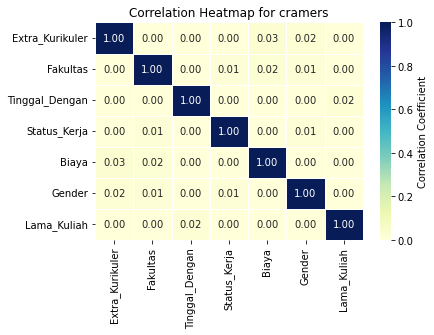

In [29]:
util_calculation.calculateCorrelationCategorical(df_train_copy)

In [30]:
df_train_copy

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Pria,61.0,66.1,79.1,71.0,78.7,74.4,69.1,77.2,65.8,61.3,Ekskul_3,Orang Tua,Belum,Orang Tua,"4,5",FIKOM
11495,Wanita,75.7,76.6,86.5,78.7,86.2,87.2,81.4,62.3,71.3,83.8,Ekskul_3,NaN,Bekerja,Beasiswa,"3,5",DKV
11496,Wanita,85.7,61.0,82.7,77.6,78.7,76.3,82.2,68.6,76.5,70.9,Ekskul_2,Kos,Bekerja,Beasiswa,5,FT
11497,Wanita,84.8,67.5,84.6,73.6,74.6,61.6,80.3,83.4,76.4,76.6,Ekskul_2,Kos,Bekerja,NaN,"4,5",DKV


In [31]:
df_train_copy[["Tinggal_Dengan","Biaya"]] = df_train_copy[["Tinggal_Dengan", "Biaya"]].fillna("kosong")

In [32]:
df_train_copy.dropna(inplace=True)

In [33]:
reload()
categoricalCols = [
    "Gender",
    "Extra_Kurikuler",
    "Status_Kerja",
    "Biaya",
    "Lama_Kuliah",
    "Fakultas",
    "Tinggal_Dengan"
]
categoricalCols+=["Bahasa_cat", "Inggris_cat", "TIK_cat",
                     "Matematika_cat", "Fisika_cat",
                     "Kimia_cat", "Biologi_cat", "Geografi_cat", "Sosiologi_cat","Antropologi_cat"]
print(categoricalCols)
df_Categorize = util_preprocessing.cutDf(df_train_copy.iloc[:,:-2], 3, numCols).copy()
df_Categorize["Lama_Kuliah"] = df_train_copy["Lama_Kuliah"]
df_Categorize["Fakultas"] = df_train_copy["Fakultas"]
df_train_copy_cleaned, catEncoder = util_preprocessing.encodeCategoricalColumn(df_Categorize, categoricalCols)
df_train_copy_cleaned

['Gender', 'Extra_Kurikuler', 'Status_Kerja', 'Biaya', 'Lama_Kuliah', 'Fakultas', 'Tinggal_Dengan', 'Bahasa_cat', 'Inggris_cat', 'TIK_cat', 'Matematika_cat', 'Fisika_cat', 'Kimia_cat', 'Biologi_cat', 'Geografi_cat', 'Sosiologi_cat', 'Antropologi_cat']


,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,...,TIK_cat,Matematika_cat,Fisika_cat,Kimia_cat,Biologi_cat,Geografi_cat,Sosiologi_cat,Antropologi_cat,Lama_Kuliah,Fakultas
0,0,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,...,0,2,2,2,0,1,0,1,0,0
1,1,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,...,2,2,0,0,1,1,0,0,1,1
2,1,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,...,2,0,2,2,1,2,1,0,2,1
3,1,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,...,0,0,1,2,2,0,1,0,4,0
4,1,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,...,1,2,0,0,1,0,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,0,61.0,66.1,79.1,71.0,78.7,74.4,69.1,77.2,65.8,...,1,1,1,1,0,1,0,0,2,1
11495,1,75.7,76.6,86.5,78.7,86.2,87.2,81.4,62.3,71.3,...,2,1,2,2,2,0,1,2,0,0
11496,1,85.7,61.0,82.7,77.6,78.7,76.3,82.2,68.6,76.5,...,2,1,1,1,2,0,1,1,3,3
11497,1,84.8,67.5,84.6,73.6,74.6,61.6,80.3,83.4,76.4,...,2,1,1,0,2,2,1,1,2,0


Correlation Matrix for cramers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,Inggris_cat,Matematika_cat,Sosiologi_cat,Fakultas,Fisika_cat,Geografi_cat,Bahasa_cat,Biologi_cat,Kimia_cat,Tinggal_Dengan,Status_Kerja,Antropologi_cat,TIK_cat,Biaya,Gender
Inggris_cat,1.000000,0.000000,0.000000,0.008321,0.000000,0.000000,0.004448,0.015303,0.000000,0.000000,0.000000,0.000000,0.014645,0.000000,0.007156
Matematika_cat,0.000000,1.000000,0.000000,0.000000,0.000000,0.004749,0.000000,0.000000,0.030075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sosiologi_cat,0.000000,0.000000,1.000000,0.000000,0.000000,0.010969,0.008680,0.004091,0.000000,0.011751,0.000000,0.010426,0.000000,0.000000,0.000000
Fakultas,0.008321,0.000000,0.000000,1.000000,0.000000,0.002949,0.001764,0.000000,0.011336,0.000000,0.022194,0.000000,0.000000,0.004313,0.012918
Fisika_cat,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.020465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006076
Geografi_cat,0.000000,0.004749,0.010969,0.002949,0.000000,1.000000,0.005374,0.000000,0.013669,0.000000,0.019429,0.000000,0.015674,0.014918,0.000000
Bahasa_cat,0.004448,0.000000,0.008680,0.001764,0.020465,0.005374,1.000000,0.000000,0.002837,0.006827,0.000000,0.000000,0.012878,0.008622,0.000000
Biologi_cat,0.015303,0.000000,0.004091,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.014978,0.006855,0.000000,0.000000,0.000000
Kimia_cat,0.000000,0.030075,0.000000,0.011336,0.000000,0.013669,0.002837,0.000000,1.000000,0.000000,0.000000,0.012158,0.016905,0.013656,0.000000
Tinggal_Dengan,0.000000,0.000000,0.011751,0.000000,0.000000,0.000000,0.006827,0.000000,0.000000,1.000000,0.000000,0.000000,0.002398,0.017026,0.000000


<AxesSubplot:title={'center':'Correlation Heatmap for cramers'}>

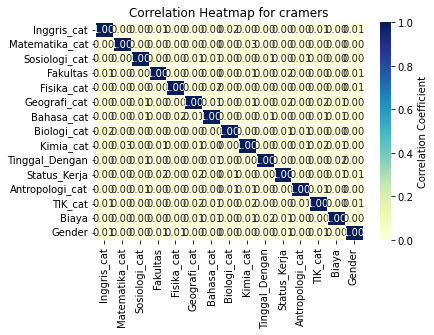

In [34]:

util_calculation.calculateCorrelationCategorical(df_train_copy_cleaned)

In [35]:
X = df_train_copy_cleaned.iloc[:, :-2].copy()
Y = df_train_copy_cleaned["Fakultas"]

In [36]:
df_train_copy_cleaned

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,...,TIK_cat,Matematika_cat,Fisika_cat,Kimia_cat,Biologi_cat,Geografi_cat,Sosiologi_cat,Antropologi_cat,Lama_Kuliah,Fakultas
0,0,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,...,0,2,2,2,0,1,0,1,0,0
1,1,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,...,2,2,0,0,1,1,0,0,1,1
2,1,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,...,2,0,2,2,1,2,1,0,2,1
3,1,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,...,0,0,1,2,2,0,1,0,4,0
4,1,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,...,1,2,0,0,1,0,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,0,61.0,66.1,79.1,71.0,78.7,74.4,69.1,77.2,65.8,...,1,1,1,1,0,1,0,0,2,1
11495,1,75.7,76.6,86.5,78.7,86.2,87.2,81.4,62.3,71.3,...,2,1,2,2,2,0,1,2,0,0
11496,1,85.7,61.0,82.7,77.6,78.7,76.3,82.2,68.6,76.5,...,2,1,1,1,2,0,1,1,3,3
11497,1,84.8,67.5,84.6,73.6,74.6,61.6,80.3,83.4,76.4,...,2,1,1,0,2,2,1,1,2,0


In [37]:
reload()
ds = util_diagnostic.getChiSquareSummary(df_train_copy_cleaned, categoricalCols)

df_sorted = ds.sort_values(by="p_value")
df_sorted.head(10)

e:\Portoflio\DiagnosticReasoning_HouseRent\util_diagnostic.py:96: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

e:\Portoflio\DiagnosticReasoning_HouseRent\util_diagnostic.py:96: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

e:\Portoflio\DiagnosticReasoning_HouseRent\util_diagnostic.py:96: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

e:\Portoflio\DiagnosticReasoning_HouseRent\util_diagnostic.py:96: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

e:\Portoflio\DiagnosticReasoning_HouseRent\util_diagnostic.py:96: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

,column1,column2,chi_square,p_value
116,Matematika_cat,Kimia_cat,21.701165,0.000230
94,Bahasa_cat,Fisika_cat,12.196465,0.015949
47,Biaya,Tinggal_Dengan,9.673422,0.046303
110,TIK_cat,Kimia_cat,9.593142,0.047868
42,Status_Kerja,Geografi_cat,5.694157,0.058014
33,Status_Kerja,Fakultas,8.820884,0.065736
112,TIK_cat,Geografi_cat,8.808337,0.066073
104,Inggris_cat,Biologi_cat,8.583542,0.072395
55,Biaya,Geografi_cat,8.355740,0.079383
25,Extra_Kurikuler,Fisika_cat,19.291575,0.081731


In [ ]:
from lazypredict.Supervised import LazyClassifier


In [55]:
reload()
knn_params = {
    "n_neighbors" : (2, 20, 1)
}
svc_params = {
    "C" : (0.01, 1, 0.1)
}
random_params = {
    "n_estimators" : (100, 500, 50),
    "max_depth" : (1, 5, 1),
}
knn = util_modelling.prepareKNN()
svc = util_modelling.prepareSVM()
randomFR = util_modelling.prepareRandomForest()

util_modelling.doFindABestHyperparams(knn, np.array(X),np.array(Y) , knn_params)
util_modelling.doFindABestHyperparams(svc, np.array(X),np.array(Y), svc_params)
util_modelling.doFindABestHyperparams(randomFR, np.array(X), np.array(Y), random_params )

{'n_neighbors': 1}
0.20531154239019409
0.20531154239019409
0.20531154239019409
0.20531154239019409
{'C': 1}
0.18590398365679264
0.18590398365679264
0.18590398365679264
0.18590398365679262
{'max_depth': 5, 'n_estimators': 500}
0.1843718079673136
0.1843718079673136
0.1843718079673136
0.1843718079673136


In [56]:
reload()
util_modelling.doStratifiedCrossvalidation(util_modelling.prepareRandomForest(n_estimator=500,n_depth=5), np.array(X), np.array(Y))

[0.20582226762002043]
[0.20582226762002043]
[0.20582226762002043]
[0.20582226762002043]
[0.20582226762002043, 0.1940755873340143]
[0.20582226762002043, 0.1940755873340143]
[0.20582226762002043, 0.1940755873340143]
[0.20582226762002043, 0.1940755873340143]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106, 0.199795605518651]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106, 0.199795605518651]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106, 0.199795605518651]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106, 0.19979560551865103]
[0.20582226762002043, 0.1940755873340143, 0.20388349514563106, 0.199795605518651, 0.1941747572815534]
[0.20582226762002043, 0.1940755873340143, 0.2038834951456310

(0.19955034257997403,
 0.19955034257997403,
 0.19955034257997403,
 0.19955034257997406)

In [61]:
reload()
util_modelling.doStratifiedCrossvalidation(util_modelling.prepareSVM(1),np.array(X), np.array(Y) )

[0.19662921348314608]
[0.19662921348314608]
[0.19662921348314608]
[0.19662921348314605]
[0.19662921348314608, 0.20326864147088866]
[0.19662921348314608, 0.20326864147088866]
[0.19662921348314608, 0.20326864147088866]
[0.19662921348314605, 0.20326864147088866]
[0.19662921348314608, 0.20326864147088866, 0.200817577925396]
[0.19662921348314608, 0.20326864147088866, 0.200817577925396]
[0.19662921348314608, 0.20326864147088866, 0.200817577925396]
[0.19662921348314605, 0.20326864147088866, 0.20081757792539603]
[0.19662921348314608, 0.20326864147088866, 0.200817577925396, 0.1946857434849259]
[0.19662921348314608, 0.20326864147088866, 0.200817577925396, 0.1946857434849259]
[0.19662921348314608, 0.20326864147088866, 0.200817577925396, 0.1946857434849259]
[0.19662921348314605, 0.20326864147088866, 0.20081757792539603, 0.1946857434849259]
[0.19662921348314608, 0.20326864147088866, 0.200817577925396, 0.1946857434849259, 0.19059785385794584]
[0.19662921348314608, 0.20326864147088866, 0.200817577925

(0.1971998060444605,
 0.1971998060444605,
 0.1971998060444605,
 0.1971998060444605)

In [41]:
reload()
util_modelling.doStratifiedCrossvalidation(util_modelling.prepareKNN(),np.array(X), np.array(Y) )

[0.2007150153217569]
[0.2007150153217569]
[0.2007150153217569]
[0.2007150153217569]
[0.2007150153217569, 0.20020429009193055]
[0.2007150153217569, 0.20020429009193055]
[0.2007150153217569, 0.20020429009193055]
[0.2007150153217569, 0.20020429009193055]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809, 0.20235053653551355]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809, 0.20235053653551355]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809, 0.20235053653551355]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809, 0.20235053653551355]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809, 0.20235053653551355, 0.1992846193152785]
[0.2007150153217569, 0.20020429009193055, 0.1936637710781809, 0.2

(0.19924364646853207,
 0.19924364646853207,
 0.19924364646853207,
 0.19924364646853207)

In [40]:
reload()
modelMLP = util_modelling.createMLP(lr=0.001)
modelMLP.fit(np.array(X[numCols], dtype=np.float32), np.array(Y, dtype=np.float32), batch_size=32, epochs=100)
#util_modelling.doStratifiedCrossvalidation(modelMLP, np.array(X,dtype=np.float32), np.array(Y,dtype=np.float32), 5,True, isMLP=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 31,605
Trainable params: 31,605
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
306/306 [==========================